In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "GenderFromEye",
    shuffle=True,
    image_size=(56, 56),
    batch_size=32
)

Found 11525 files belonging to 2 classes.


In [3]:
class_names = dataset.class_names
class_names

['femaleeyes', 'maleeyes']

In [4]:
len(dataset)

361

In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(56, 56),
    layers.Rescaling(1./56)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

In [10]:
model = models.Sequential([
    layers.Input(shape=(56, 56, 3)),

    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])


In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 56, 56, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 56, 56, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 54, 54, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,979 (621.01 KB)

 Trainable params: 158,979 (621.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history_2 = model.fit(
    train_ds, 
    epochs=200,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9364 - loss: 0.1587 - val_accuracy: 0.9479 - val_loss: 0.1266
Epoch 2/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9369 - loss: 0.1568 - val_accuracy: 0.9566 - val_loss: 0.1122
Epoch 3/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9412 - loss: 0.1526 - val_accuracy: 0.9470 - val_loss: 0.1332
Epoch 4/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9418 - loss: 0.1542 - val_accuracy: 0.9575 - val_loss: 0.1058
Epoch 5/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9354 - loss: 0.1650 - val_accuracy: 0.9470 - val_loss: 0.1251
Epoch 6/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9406 - loss: 0.1550 - val_accuracy: 0.9514 - val_loss: 0.1137
Epoch 7/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9423 - loss: 0.1554 - val_accuracy: 0.9453 - val_loss: 0.1293
Epoch 8/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9399 - loss: 0.1562 - 

In [29]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "model_checkpoint.keras",
    save_best_only=True
)

In [30]:
history_2

In [31]:
scores = model.evaluate(test_ds)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9676 - loss: 0.1015


In [32]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

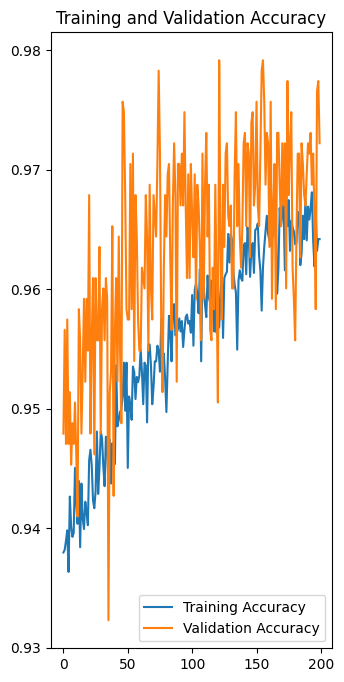

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(200), acc, label='Training Accuracy')
plt.plot(range(200), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label:  femaleeyes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
femaleeyes
first image to predict
actual label:  maleeyes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
maleeyes
first image to predict
actual label:  femaleeyes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
femaleeyes
first image to predict
actual label:  femaleeyes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
femaleeyes
first image to predict
actual label:  femaleeyes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
femaleeyes


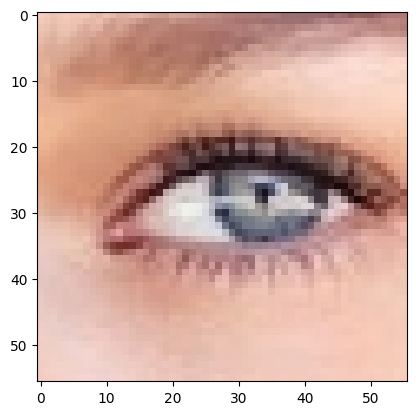

In [35]:
import numpy as np

for images_batch, labels_batch in test_ds.take(5):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


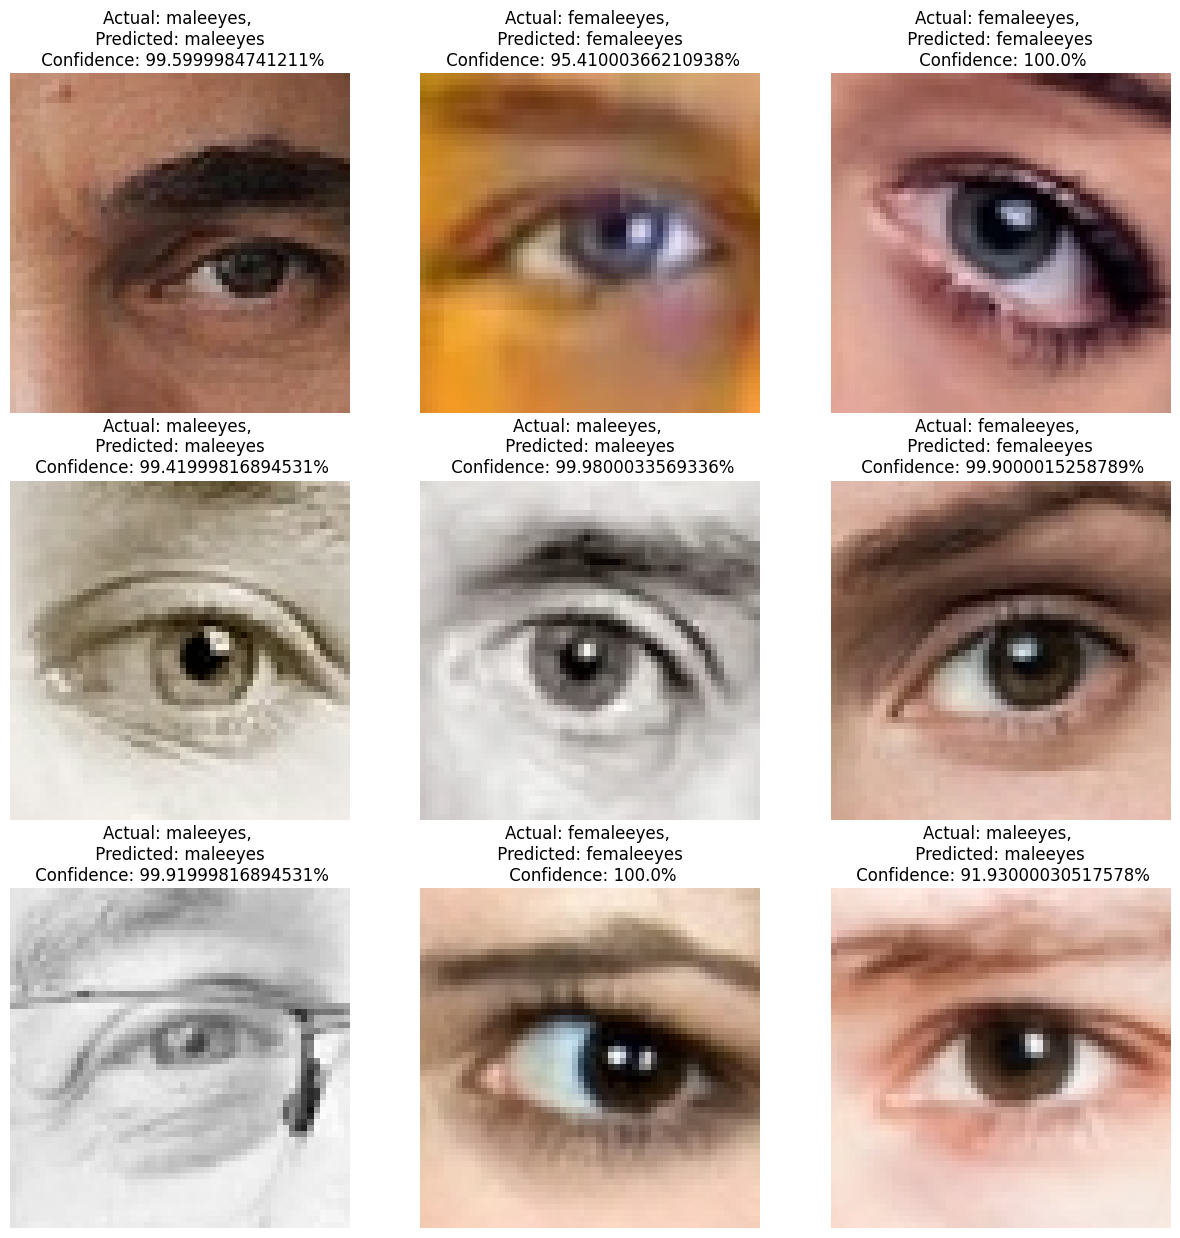

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class} \n Confidence: {confidence}%")

        plt.axis("off")